In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import random

import scipy.stats as st
from os import listdir
from os.path import isfile, join

import seaborn as sns
sns.set_style("whitegrid")

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
files = ['./data/CMAP.csv', './data/CMAP_synthetic.csv', './data/control.csv']
labels = ['original', 'synthetic', 'control']

In [3]:
pal = sns.color_palette("rainbow", len(files)-1)
pal.append((0,0,0))
pal = pal[::-1]
sns.set_palette(pal)
pal

[(0, 0, 0),
 (0.8333333333333333, 0.8660254037844387, 0.5000000000000001),
 (0.16666666666666663, 0.8660254037844386, 0.8660254037844387)]

In [4]:
dfs = [pd.read_csv(file) for file in files]

In [5]:
ints = ['travel_dow', 'hh_vehicles', 'hh_size', 'hh_bikes', 'hh_income', 'gender', 'education_level', 'age', 'license']
floats = ['departure_time', 'distance']

In [6]:
dct = {}

for i in ints:
    dct[i] = 'int64'
    
for i in floats:
    dct[i] = 'float64'

In [7]:
dfs = [df.astype(dct) for df in dfs]

In [8]:
choices = {}
trip_purpose = {}
work_status = {}

for c in ['choice', 'trip_purpose', 'work_status']: 
    dct = {}
    
    for n, i in enumerate(dfs[0][c].unique()):
        if c == 'choice':
            choices[n] = i
            
        if c == 'trip_purpose':
            trip_purpose[n] = i
            
        if c == 'work_status':
            work_status[n] = i
        
        dct[i] = n

# Histograms

In [9]:
cont_cols = [3, 10, 14]

In [10]:
msk = []

for i in range(len(dfs[0].columns)):
    msk.append(i not in cont_cols)

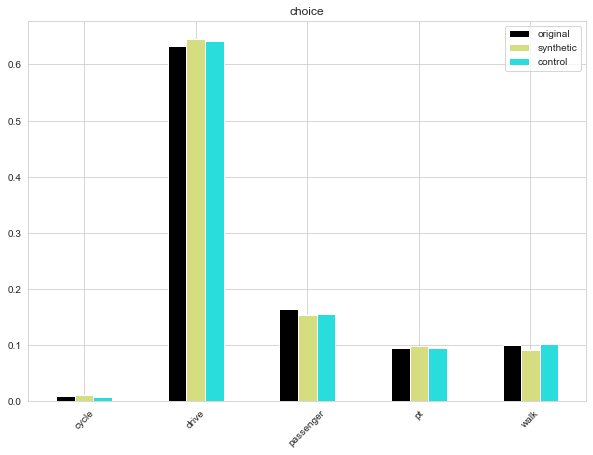

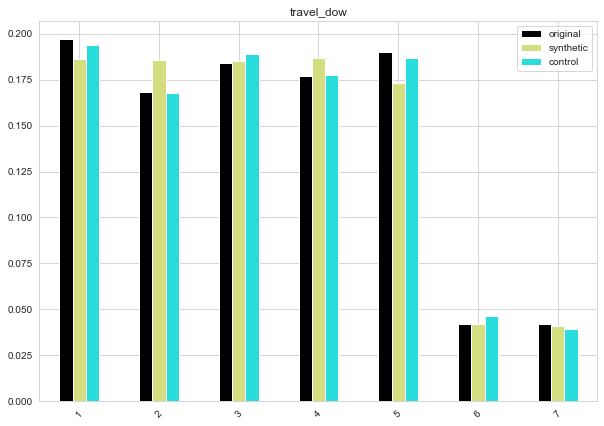

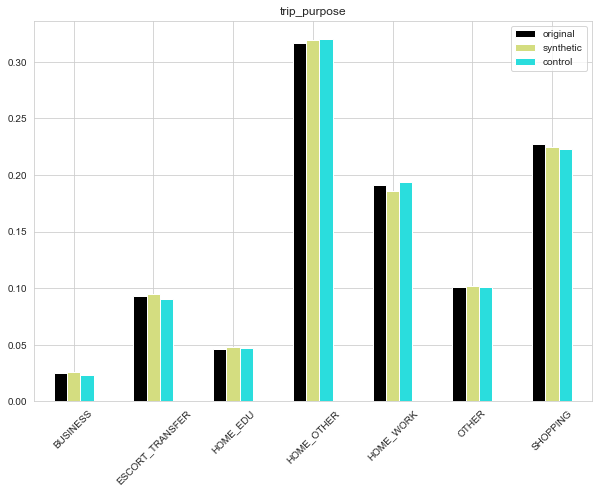

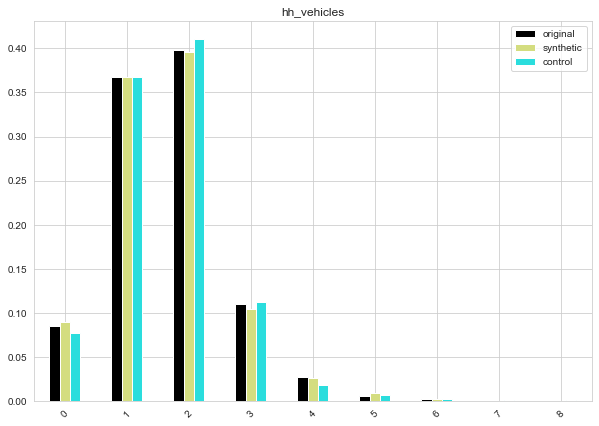

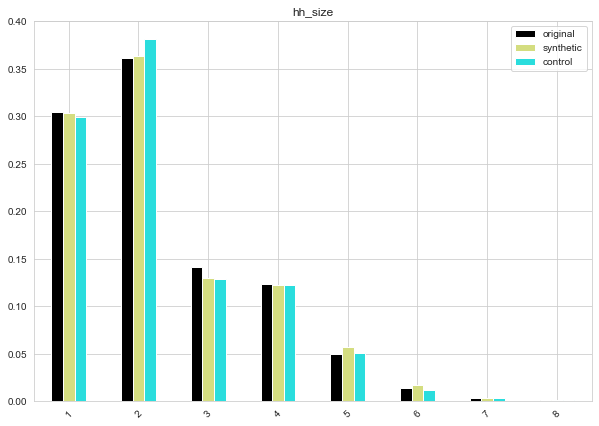

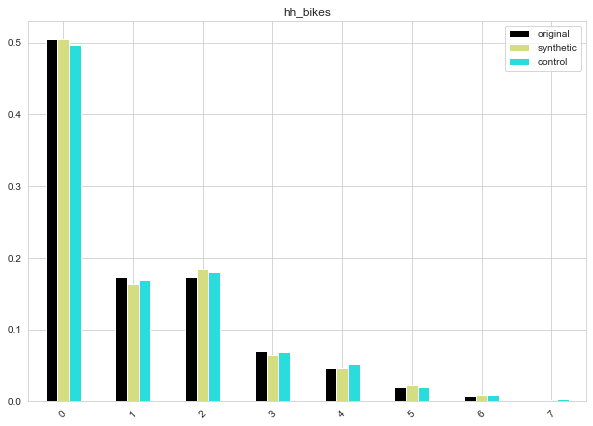

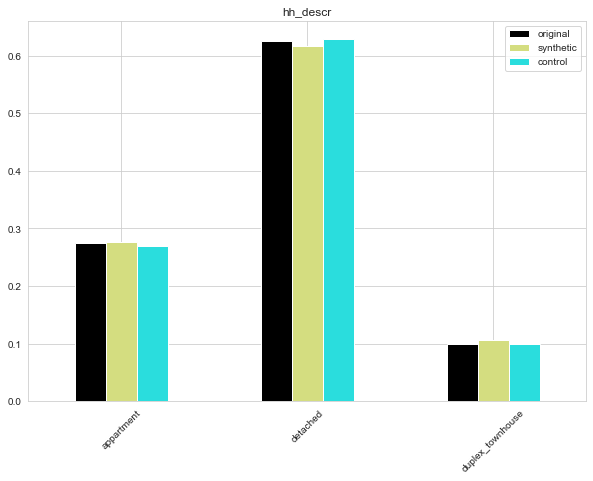

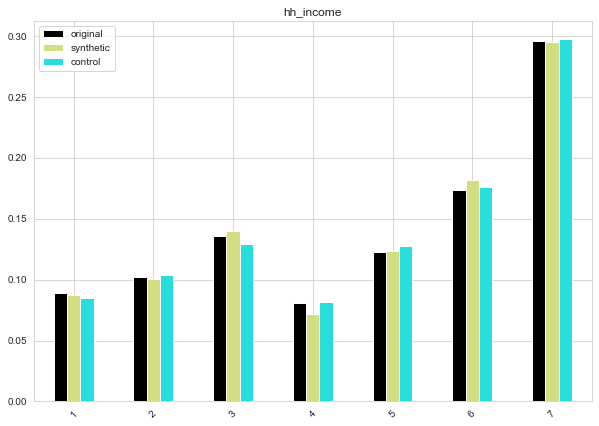

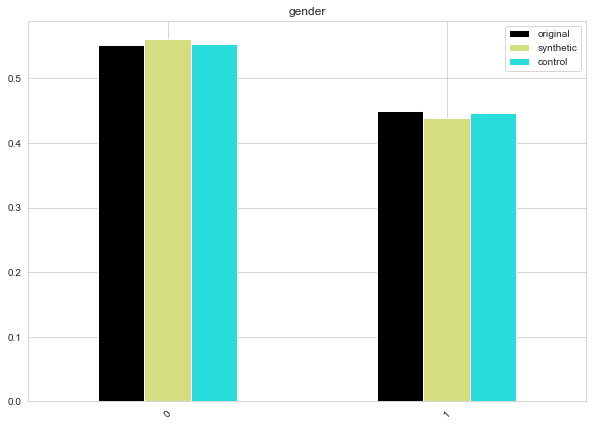

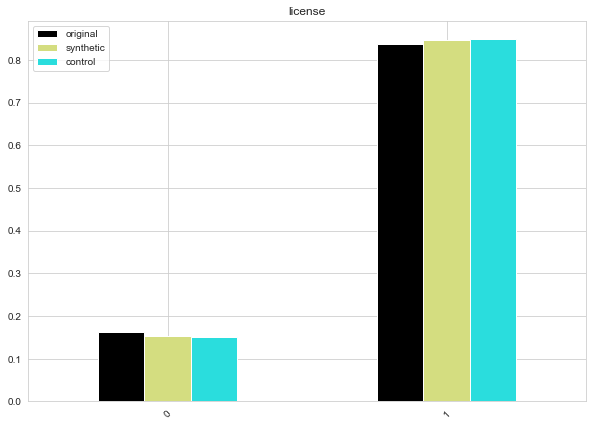

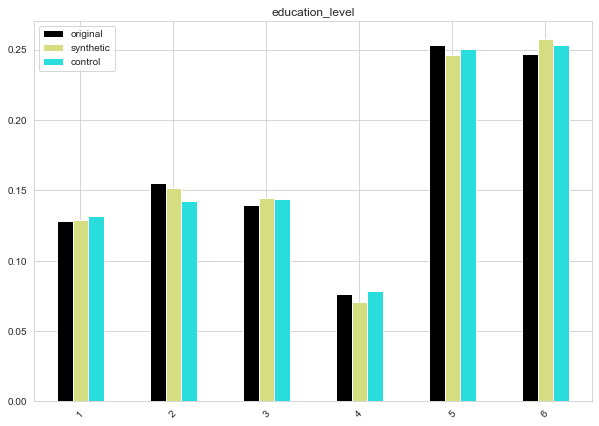

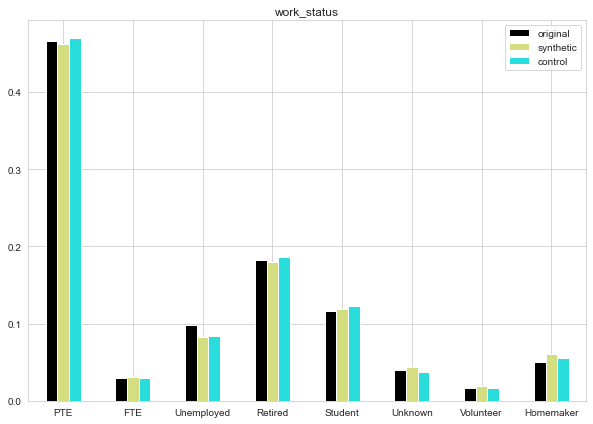

In [11]:
for col in dfs[0].columns[msk]:
    
    probs = [df[col].value_counts(normalize=True) for df in dfs]
    
    dct = {}
    for l in labels:
        dct[l] = []
    
    idx = np.sort(probs[0].index)
    
    for i in idx:       
        for j, l in enumerate(labels):
            try:
                val = probs[j].loc[i]
            except:
                val = 0
            dct[l].append(val)

        
    tmp_df = pd.DataFrame(dct, index=idx)
    
    tmp_df.plot(figsize=(10,7), kind='bar')

    plt.legend()
    plt.xticks(rotation=45)

    if col == 'work_status':
        x_names = []
        for i in work_status.keys():
            x_names.append(work_status[i])
                    
        plt.xticks(list(range(0,len(x_names))), x_names, rotation=0)

    plt.title(col)

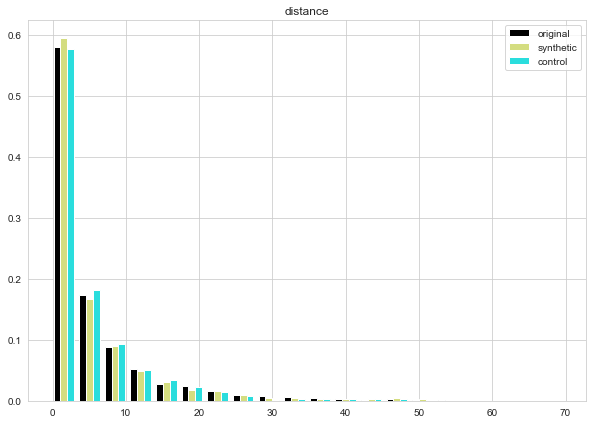

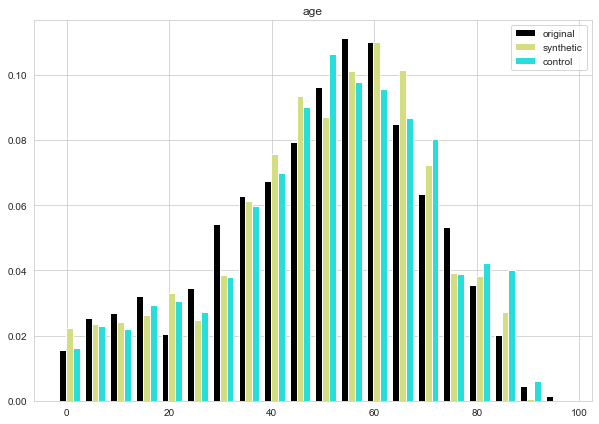

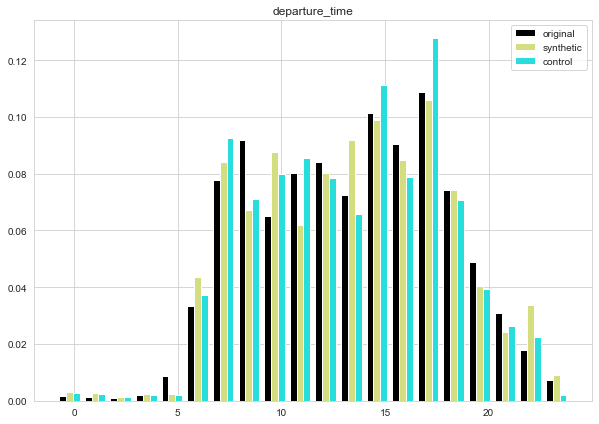

In [12]:
for col in dfs[0].columns[~np.array(msk)]:
    
    vals = [df[col] for df in dfs]
    weights = [np.ones_like(v)/len(v) for v in vals]
    
    plt.figure(figsize=(10,7))
    
    bins=np.histogram(np.hstack((vals[0],vals[1])), bins=20)[1] 
    
    plt.hist(vals,
             bins=bins, weights = weights,
             label=labels)
    
    plt.legend()
    plt.title(col)